In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb

figuring out data properties

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data-tinggi-muka-air-februari-2020.csv to data-tinggi-muka-air-februari-2020.csv


In [ ]:
Data = pd.read_csv("data-tinggi-muka-air-februari-2020.csv")
print(Data.dtypes)
print(Data.isna().values.any())

nama_pintu_air     object
lokasi             object
latitude          float64
longitude         float64
tanggal            object
tinggi_air          int64
status_siaga       object
dtype: object
False


In [ ]:
floodData = Data[["nama_pintu_air","lokasi","tanggal","tinggi_air","status_siaga"]]
floodData.head()

,nama_pintu_air,lokasi,tanggal,tinggi_air,status_siaga
0,PA. Cibalok - Gadog,Ciliwung,2020-01-31 23:40:00,-50,Status : Normal
1,PS. Katulampa (Hulu),Ciliwung,2020-01-31 23:40:00,130,Status : Normal
2,PS. Depok,Ciliwung,2020-01-31 23:40:00,760,Status : Normal
3,PA. Manggarai,Ciliwung,2020-01-31 23:40:00,5890,Status : Normal
4,PS. Krukut Hulu,Krukut,2020-01-31 15:00:11,200,Status : Normal


In [ ]:
floodData['tanggal'] = floodData['tanggal'].str[:10]
floodData.head(1000)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,nama_pintu_air,lokasi,tanggal,tinggi_air,status_siaga
0,PA. Cibalok - Gadog,Ciliwung,2020-01-31,-50,Status : Normal
1,PS. Katulampa (Hulu),Ciliwung,2020-01-31,130,Status : Normal
2,PS. Depok,Ciliwung,2020-01-31,760,Status : Normal
3,PA. Manggarai,Ciliwung,2020-01-31,5890,Status : Normal
4,PS. Krukut Hulu,Krukut,2020-01-31,200,Status : Normal
...,...,...,...,...,...
995,Pompa Pasar Ikan,Laut,2020-02-01,1580,Status : Normal
996,P.A. Pluit,Waduk Pluit,2020-02-01,-1710,Status : Normal
997,PS. Pesanggrahan,Pesanggrahan,2020-02-01,850,Status : Normal
998,PS. Angke Hulu,Angke,2020-02-01,1790,Status : Siaga 3


In [ ]:
normal = floodData.loc[floodData['status_siaga']=='Status : Normal']
print(normal)
siaga_3 = floodData.loc[floodData['status_siaga']=='Status : Siaga 3']
print(siaga_3)
siaga_2 = floodData.loc[floodData['status_siaga']=='Status : Siaga 2']
print(siaga_2)
siaga_1 = floodData.loc[floodData['status_siaga']=='Status : Siaga 1']
print(siaga_1)

temp_location["status_siaga"].unique()

                   nama_pintu_air           lokasi  ... tinggi_air     status_siaga
0       Bendung. Katulampa (Hulu)         Ciliwung  ...        100  Status : Normal
1                       PS. Depok         Ciliwung  ...        700  Status : Normal
2                   PA. Manggarai         Ciliwung  ...       5590  Status : Normal
3                 PS. Krukut Hulu           Krukut  ...        100  Status : Normal
4                    Pompa Cideng   Cideng Siantar  ...         40  Status : Normal
...                           ...              ...  ...        ...              ...
27097           PS. Cipinang Hulu    Cipinang Hulu  ...        390  Status : Normal
27098  Pompa Kali Duri (Kalijodo)        Kali Duri  ...        500  Status : Normal
27099             P.A. Istiqlal           Ciliwung  ...       2240  Status : Normal
27100         P.A. Jembatan Merah         Ciliwung  ...       1360  Status : Normal
27102                    P.A. Hek  Kali Baru Timur  ...       1300  Status :

array(['Status : Normal'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb001c160b8>]],
      dtype=object)

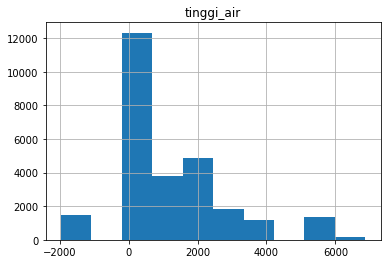

In [ ]:
normal.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0023f47f0>]],
      dtype=object)

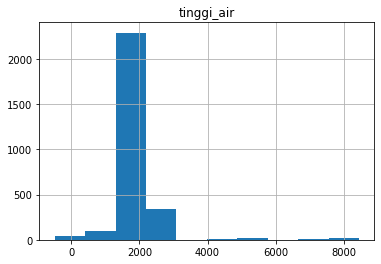

In [ ]:
siaga_3.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb001d59a90>]],
      dtype=object)

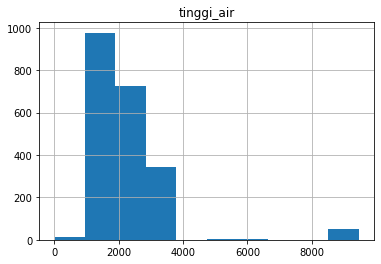

In [ ]:
siaga_2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb001c809e8>]],
      dtype=object)

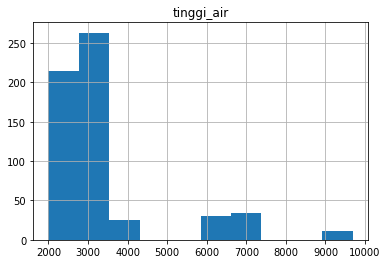

In [ ]:
siaga_1.hist()

In [ ]:
print(floodData["nama_pintu_air"].value_counts())
pintu_air = floodData["nama_pintu_air"].unique()
lokasi_N = floodData["lokasi"].unique()
print("Total pintu air: "+ str(len(pintu_air)))
print("Total lokasi: "+ str(len(lokasi_N)))

PA. Pulo Gadung               985
PS. Sunter Hulu               985
Pompa Pasar Ikan              985
P.A. Jembatan Merah           985
PA. Cibalok - Gadog           985
P.A. Hek                      985
Pompa Cideng                  985
P.A. Ancol Flusing            985
PS. Depok                     985
P.A. Istiqlal                 985
Pompa Kali Duri (Kalijodo)    985
PS. Cipinang Hulu             985
PS. Krukut Hulu               985
PS. Katulampa (Hulu)          985
P.A. Marina Ancol             985
PA. Manggarai                 985
PS. Angke Hulu                985
Pompa Yos Sudarso 1           985
PS. Pesanggrahan              985
P.A. Pluit                    985
P.A. Karet                    985
Name: nama_pintu_air, dtype: int64
Total pintu air: 21
Total lokasi: 13


In [ ]:
test_array = []


for i in lokasi_N:
  temp_location = floodData.loc[floodData['lokasi'] == i]

  status_normal = temp_location.loc[temp_location['status_siaga']=='Status : Normal'].shape[0]
  status_siaga_3 = temp_location.loc[temp_location['status_siaga']=='Status : Siaga 3'].shape[0]
  status_siaga_2 = temp_location.loc[temp_location['status_siaga']=='Status : Siaga 2'].shape[0]
  status_siaga_1 = temp_location.loc[temp_location['status_siaga']=='Status : Siaga 1'].shape[0]
  
  tinggi_n = temp_location.loc[temp_location['status_siaga']=='Status : Normal']["tinggi_air"].mean()
  tinggi_s3 = temp_location.loc[temp_location['status_siaga']=='Status : Siaga 3']["tinggi_air"].mean()
  tinggi_s2 = temp_location.loc[temp_location['status_siaga']=='Status : Siaga 2']["tinggi_air"].mean()
  tinggi_s1 = temp_location.loc[temp_location['status_siaga']=='Status : Siaga 1']["tinggi_air"].mean()

  unique = temp_location["nama_pintu_air"].unique()
  temp = [i, len(unique), "February", temp_location["lokasi"].count(), status_normal, status_siaga_3, status_siaga_2, status_siaga_1, tinggi_n, tinggi_s3, tinggi_s2, tinggi_s1]
  test_array.append(temp)
  print(i + ": " + str(len(unique)) + " = " + str(temp_location["lokasi"].count()/len(unique)))


test = pd.DataFrame(test_array, columns=['Lokasi', 'Gates', 'Month', 'Reports', 'Normal', 'Siaga 3', 'Siaga 2', 'Siaga 1', 'Tinggi N', 'Tinggi S3', 'Tinggi S2', 'Tinggi S1'])

Ciliwung: 7 = 985.0
Krukut: 1 = 985.0
Cideng Siantar: 1 = 985.0
Banjir Kanal Barat: 1 = 985.0
Laut: 2 = 985.0
Waduk Pluit: 1 = 985.0
Pesanggrahan: 1 = 985.0
Angke: 1 = 985.0
Sunter: 2 = 985.0
Sunter Timur: 1 = 985.0
Cipinang Hulu: 1 = 985.0
Kali Duri: 1 = 985.0
Kali Baru Timur: 1 = 985.0


In [ ]:
#for x in test_array:
  #print(x)

test.to_csv("October.csv")

based on this we can tell that the data is not biased but cideng and aliran cideng are lazy muthafuckas

In [ ]:
test.head()

,Lokasi,Gates,Month,Reports,Normal,Siaga 3,Siaga 2,Siaga 1,Tinggi N,Tinggi S3,Tinggi S2,Tinggi S1
0,Ciliwung,7,February,6895,5506,368,803,218,1998.103887,3717.853261,2285.803238,2407.018349
1,Krukut,1,February,985,969,16,0,0,332.291022,2075.000000,NaN,NaN
2,Cideng Siantar,1,February,985,981,4,0,0,267.808359,1600.000000,NaN,NaN
3,Banjir Kanal Barat,1,February,985,852,68,20,45,3349.953052,4869.411765,5748.000000,6559.777778
4,Laut,2,February,1970,1054,659,257,0,1491.622391,1834.810319,2081.634241,NaN


In [ ]:
gate_N = Data["nama_pintu_air"].unique()

for j in gate_N:
  lokasi_X = Data.loc[Data['nama_pintu_air'] == j]
  extra_unique = lokasi_X["tanggal"].unique()
  calculation = lokasi_X["nama_pintu_air"].count() / len(extra_unique)
  #print(j + ": " + str(calculation))
  #print(lokasi_X.head())
  #print(extra_unique)

machine learning to classify siaga

In [ ]:
display(floodData.head())
display(floodData["nama_pintu_air"].unique())

,nama_pintu_air,lokasi,tanggal,tinggi_air,status_siaga
0,PA. Cibalok - Gadog,Ciliwung,2020-01-31,-50,Status : Normal
1,PS. Katulampa (Hulu),Ciliwung,2020-01-31,130,Status : Normal
2,PS. Depok,Ciliwung,2020-01-31,760,Status : Normal
3,PA. Manggarai,Ciliwung,2020-01-31,5890,Status : Normal
4,PS. Krukut Hulu,Krukut,2020-01-31,200,Status : Normal


array(['PA. Cibalok - Gadog', 'PS. Katulampa (Hulu)', 'PS. Depok',
       'PA. Manggarai', 'PS. Krukut Hulu', 'Pompa Cideng', 'P.A. Karet',
       'P.A. Marina Ancol ', 'Pompa Pasar Ikan', 'P.A. Pluit',
       'PS. Pesanggrahan', 'PS. Angke Hulu', 'PS. Sunter Hulu',
       'PA. Pulo Gadung', 'Pompa Yos Sudarso 1', 'PS. Cipinang Hulu',
       'Pompa Kali Duri (Kalijodo)', 'P.A. Istiqlal  ',
       'P.A. Jembatan Merah', 'P.A. Ancol Flusing', 'P.A. Hek'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#dataset = floodData.loc[:,floodData.columns != 'status_siaga']
#label = floodData['status_siaga']

dataset = floodData.copy()

dataset['tanggal'] = dataset['tanggal'].str[5:]

#apply encoder for classification data
Oencoder = OrdinalEncoder()
le = OrdinalEncoder()

dataset[['tanggal']]=Oencoder.fit_transform(dataset[['tanggal']],)
dataset = pd.get_dummies(dataset,prefix=['nama_pintu_air','lokasi'],columns=['nama_pintu_air','lokasi'])

siaga_encoder = le.fit(dataset[['status_siaga']])

dataset[['status_siaga']] = le.transform(dataset[['status_siaga']])

#dataset[['status_siaga']] = le.inverse_transform(dataset[['status_siaga']])

#label_encoder = Oencoder.fit(label['status_siaga'])
#label = label_encoder.transform(label)

dataset.head()

,tanggal,tinggi_air,status_siaga,nama_pintu_air_P.A. Ancol Flusing,nama_pintu_air_P.A. Hek,nama_pintu_air_P.A. Istiqlal,nama_pintu_air_P.A. Jembatan Merah,nama_pintu_air_P.A. Karet,nama_pintu_air_P.A. Marina Ancol,nama_pintu_air_P.A. Pluit,nama_pintu_air_PA. Cibalok - Gadog,nama_pintu_air_PA. Manggarai,nama_pintu_air_PA. Pulo Gadung,nama_pintu_air_PS. Angke Hulu,nama_pintu_air_PS. Cipinang Hulu,nama_pintu_air_PS. Depok,nama_pintu_air_PS. Katulampa (Hulu),nama_pintu_air_PS. Krukut Hulu,nama_pintu_air_PS. Pesanggrahan,nama_pintu_air_PS. Sunter Hulu,nama_pintu_air_Pompa Cideng,nama_pintu_air_Pompa Kali Duri (Kalijodo),nama_pintu_air_Pompa Pasar Ikan,nama_pintu_air_Pompa Yos Sudarso 1,lokasi_Angke,lokasi_Banjir Kanal Barat,lokasi_Cideng Siantar,lokasi_Ciliwung,lokasi_Cipinang Hulu,lokasi_Kali Baru Timur,lokasi_Kali Duri,lokasi_Krukut,lokasi_Laut,lokasi_Pesanggrahan,lokasi_Sunter,lokasi_Sunter Timur,lokasi_Waduk Pluit
0,0.0,-50,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.0,130,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.0,760,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.0,5890,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.0,200,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


split training and testing 80%, 20%

training it with logistic regression

In [ ]:
Train, Test = train_test_split(dataset, test_size=0.2)

display(Train.head())

XTrain = Train.loc[:,Train.columns != 'status_siaga']
YTrain = Train['status_siaga']

from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression(max_iter=1000).fit(XTrain, YTrain.astype('int').values.ravel())

,tanggal,tinggi_air,status_siaga,nama_pintu_air_P.A. Ancol Flusing,nama_pintu_air_P.A. Hek,nama_pintu_air_P.A. Istiqlal,nama_pintu_air_P.A. Jembatan Merah,nama_pintu_air_P.A. Karet,nama_pintu_air_P.A. Marina Ancol,nama_pintu_air_P.A. Pluit,nama_pintu_air_PA. Cibalok - Gadog,nama_pintu_air_PA. Manggarai,nama_pintu_air_PA. Pulo Gadung,nama_pintu_air_PS. Angke Hulu,nama_pintu_air_PS. Cipinang Hulu,nama_pintu_air_PS. Depok,nama_pintu_air_PS. Katulampa (Hulu),nama_pintu_air_PS. Krukut Hulu,nama_pintu_air_PS. Pesanggrahan,nama_pintu_air_PS. Sunter Hulu,nama_pintu_air_Pompa Cideng,nama_pintu_air_Pompa Kali Duri (Kalijodo),nama_pintu_air_Pompa Pasar Ikan,nama_pintu_air_Pompa Yos Sudarso 1,lokasi_Angke,lokasi_Banjir Kanal Barat,lokasi_Cideng Siantar,lokasi_Ciliwung,lokasi_Cipinang Hulu,lokasi_Kali Baru Timur,lokasi_Kali Duri,lokasi_Krukut,lokasi_Laut,lokasi_Pesanggrahan,lokasi_Sunter,lokasi_Sunter Timur,lokasi_Waduk Pluit
6285,7.0,2700,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7191,8.0,-1520,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16790,21.0,2350,3.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
19799,24.0,2000,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
262,1.0,930,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn import metrics
CTest  = LGR.predict(Test.loc[:,Test.columns != 'status_siaga'])
YTest = Test['status_siaga']
CTrain  = LGR.predict(XTrain)

print("Train set acc: ", metrics.accuracy_score(YTrain.astype('int'), CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest.astype('int'), CTest))

Train set acc:  0.8878414309886391
Test set acc:  0.8917089678510999
